# Mini Challenge Fourier Transformation

Dias Ziel dieser Aufgabe besteht darin, dass Sie ein grundlegendes Verständnis der Fouriertransformation
zur Näherung von periodischen Funktionen und dessen praktische Anwendung zur
Datenanalyse und -bearbeitung erlangen. Hierfür sollen Sie ein Jupyter Notebook erstellen, in
dem Sie die unten aufgeführten Aufgaben nacheinander bearbeiten. Zunächst werden Sie die
Fouriertransformation in numpy selbst implementieren und damit drei Funktionen fitten. Danach
werden Sie nacheinander Sonnendaten, Musik und Bilder mithilfe von Fouriertransformationen
analysieren und bearbeiten.
Ziel dieser Aufgabe ist nicht nur, Ihre mathematischen Kenntnisse unter Beweis zu stellen, sondern
auch die entsprechende Kommunikation und Präsentation Ihrer Ergebnisse. Ihre Abgaben sollen
also nicht nur mathematisch korrekt, sondern auch leicht verständlich und reproduzierbar
sein. Genauere Angaben zu den Erwartungen an die Abgabe finden Sie in den Auswertungskriterien.
Dokumentieren Sie ihren Arbeitsfortschritt und Erkenntnisgewinn in Form eines Lerntagebuchs,
um Lernfortschritte, Schwierigkeiten und Erkenntnisse festzuhalten.
Die folgenden Aufgabenstellungen präzisieren die einzelnen Bearbeitungsschritte und geben die
Struktur des Notebooks vor

# Aufgabe 1.
In dieser Aufgabe implementieren Sie die Berechnung der Fourier-Approximation in numpy (kein
fft)

## Aufgabe 1 a
(a) Implementieren Sie mit numpy eine Methode zur Berechnung der k-ten Fourier-Komponente
einer Funktion gegeben durch arrays x und y mithilfe der Trapezregel (np.trapz).

In [1]:
# CODE

import numpy as np

def kth_fourier_component(x, y, k):
    T = x[-1] - x[0]
    omega_k = 2 * np.pi * k / T

    y_cos = y * np.cos(omega_k * x)
    y_sin = y * np.sin(omega_k * x)

    a_k = (2 / T) * np.trapz(y_cos, x)
    b_k = (2 / T) * np.trapz(y_sin, x)

    return a_k, b_k


## Aufgabe 1 b
(b) Implementieren Sie mit numpy eine Methode zur Berechnung der Fourier-Approximation
fapp mit einer gegebenen Anzahl (2m + 1) von Fourier-Komponenten.

In [2]:
# CODE

def fourier_approximation(x, y, m):
    N = len(x)
    T = x[-1] - x[0]
    fapp = np.zeros(N)

    a_0 = (1 / T) * np.trapz(y, x)
    fapp += a_0 / 2

    for k in range(1, m + 1):
        a_k, b_k = kth_fourier_component(x, y, k)
        fapp += a_k * np.cos(2 * np.pi * k * x / T) + b_k * np.sin(2 * np.pi * k * x / T)

    return fapp

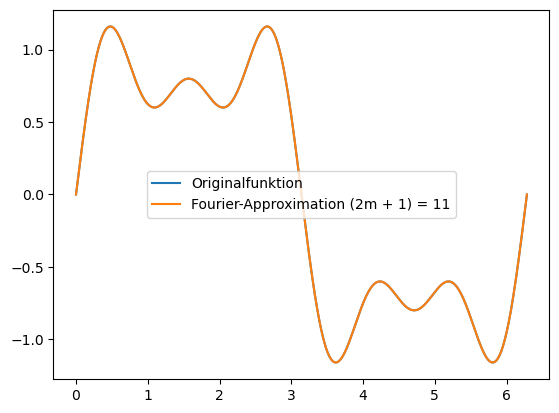

In [3]:
# Beispiel
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x) + 0.5 * np.sin(3 * x) + 0.3 * np.sin(5 * x)

m = 5
fapp = fourier_approximation(x, y, m)

plt.plot(x, y, label='Originalfunktion')
plt.plot(x, fapp, label=f'Fourier-Approximation (2m + 1) = {2 * m + 1}')
plt.legend()
plt.show()

## Aufgabe 1 c 
(c) Nähern Sie die Funktion f1(x) = 1/(ex +e−x) auf dem Intervall [−3, 3] (Auflösung: N = 600
Schritte) mit verschiedenen Anzahlen von Komponenten (2m+1). Plotten Sie den Vergleich
zur Originalfunktion f.

In [3]:
# CODE

## Aufgabe 1 d
(d) Bestimmen Sie die Anzahl der Fourier-Komponenten, die benötigt werden, um eine Approximation
mit höchstens 0,1% relativen Fehler zu erhalten.

In [4]:
# CODE

## Aufgabe 1 e
(e) Versuchen Sie die Funktionen f2(x) = ex und f3(x) = e|x| auf dem Intervall [−3, 3] (Auflösung:
N = 600 Schritte) mit einem 0,1%igen Approximationsfehler anzunähern. Beschreiben und
erklären Sie die Unterschiede.

In [5]:
# CODE

# Aufgabe 2.
In dieser Aufgabe wenden Sie die Fourier-Analyse auf Sonnenfleckendaten an (sunspots.txt). Sie
dürfen dafür die fft routine von numpy oder scipy verwenden.

In [6]:
# CODE

## Aufgabe 2 a
(a) Plotten Sie das Power-Spektrum und finden Sie die dominante Periodizität der Schwingung.
Damit erhalten Sie eine Abschätzung auf die Dauer des Sonnenzyklus.


In [7]:
# CODE

## Aufgabe 2 b
(b) Können Sie weitere Perioden in den Sonnenfleck-Daten mithilfe des Fourier-Spektrums
finden?

In [8]:
# CODE

## Aufgabe 2 c
(c) Entfernen Sie einige Komponenten im Fourier-Spektrum und führen dann eine Rücktransformation
durch:
• grössten Komponenten entfernen (k > 20)
• kleinsten Komponenten entfernen (k < 5)
Beschreiben und erklären Sie die Ergebnisse.


In [9]:
# CODE

## Aufagbe 2 d
(d) Vergleichen Sie die Ergebnisse mit denen aus Aufgabe 1. Beschreiben und erklären Sie
Unterschiede in den Fourier-Koeffizienten.

In [10]:
# CODE

# Aufgabe 3.
In dieser Aufgabe analysieren und bearbeiten Sie ein Musikstück (music.wav). Sie dürfen dafür
zB die fft routine von numpy oder scipy sowie das librosa und soundfile paket verwenden.

## Aufagbe 3 a
(a) Plotten Sie die Wellenform des Klangs (waveplot) - einmal vollständig und einmal für einen
kleinen Zeitberech, sodass die Wellenform deutlich wird - sowie das Amplitudenspektrum.
Wieso ist das Amplitudenspektrum symmetrisch bezüglich des Vorzeichens?

In [11]:
# CODE

## Aufgabe 3 b
(b) Trennen Sie den Sound-Signal in einen Teil oberhalb und unterhalb von 2 kHz in Frequenzen.
Identifizieren Sie jeweils die Top 5 Frequenzen in diesen Frequenzbereichen.

In [12]:
# CODE

## Aufgabe 3 c
(c) Berechnen Sie aus diesen beiden Teilen jeweils eine Rekonstruktion. Berechnen Sie den
Fehler der Rekonstruktion wie in Aufgabe 1 für die gefilterten Signale und schreiben Sie
die gefilterten rekonstruierten Daten in eine wav-Datei. Beschreiben und erklären Sie das
Ergebnis.

In [13]:
# CODE

# Aufgabe 4.
In dieser Aufgabe analysieren und bearbeiten Sie eine Bilddatei (img.jpg). Sie dürfen dafür die fft
routine von numpy oder scipy verwenden.

## Aufgabe 4 a
(a) Plotten Sie die 2D-Verteilung der absoluten Werte der Fourier-Komponenten, sodass die
kleinsten k-Werte in der Mitte liegen. Erklären Sie die Natur der Verteilung.

In [14]:
# CODE

## Aufgabe 4 b
(b) Entfernen Sie je die Fourier-Komponenten mit absoluter Amplitude unter dem Schwellenwert
0.001%, 0.01%, 0.1%, 1% und 10% der maximalen Amplitude. Führen Sie eine inverse
Fourier-Transformation durch und stellen Sie die gefilterten Fourierkomponenten sowie die
resultierenden Bilder dar. Beschreiben und erklären Sie die Unterschiede.

In [15]:
# CODE

## Aufgabe 4 c
(c) Berechnen Sie den Fehler (Aufgabe 1) zwischen rekonstruiertem und Originalbild. Wie weit
können die Daten kompressiert werden, ohne einen Fehler von höchstens 1% zu überschreiten?

In [16]:
# CODE

# Chatgpt

Für diese Aufgaben kann ChatGPT als Ressource genutzt werden, um Fragen zu stellen oder bei
Problemen Unterstützung zu erhalten. Vorraussetzung ist, dass Sie transparent kommunizieren,
wo und wie Sie ChatGPT eingesetzt haben und welche Verbesserungen nötig waren. Sie können
ChatGPT wie folgt nutzen:
• Stellen Sie Ihre Fragen klar und präzise.
• Formulieren Sie Ihre Fragen so, dass sie spezifisch auf Ihre Probleme abgestimmt sind.
• Seien Sie geduldig und geben Sie ChatGPT genügend Zeit, um eine sinnvolle Antwort zu
generieren.
• Verwenden Sie die Antworten von ChatGPT als eine Art von Hilfestellung und überprüfen
Sie diese stets auf ihre Richtigkeit.
Wenn Sie eine Frage stellen, die auf eine bestimmte Stelle in Ihrem Code Bezug nimmt, können
Sie den Code zusammen mit Ihrer Frage bereitstellen.

# Lerntagebuch

| Aufgabe | Schwierigkeit | Erkentnisse | Lernerfolg |
| --- | --- | --- | --- |
| 1 |  | | |
| 2 |  | | |
| 3 |  | | |
| 4 |  | | |



# Bewertungsraster

## Fourier-Approximation
1) Korrekte Implementierung der k-ten Fourier-Komponente
2) Korrekte Implementierung der Fourier-Approximation
3) Korrekte, verständliche und kompakte Plots der Funktionen und aller berechneten Approximationen
4) Korrekter relativer Fehler: mathematische Definition angegeben und korrekt implementiert
5) Korrekte Bestimmung der Anzahl der Fourier-Komponenten für einen relativen Fehler von
höchstens 0,1% bei f1, f2 und f3
6) Korrekte und verständliche Beschreibung und Erklärung der Unterschiede bei den Approximationen
der verschiedenen Funktionen
## Sonnenflecken
7) Korrekter Plot für Wellenform und Amplitudenspektrum
8) Korrekte Bestimmung der dominanten Periodizität der Schwingung in Jahren
9) Korrekte Identifizierung weiterer Perioden im Fourier-Spektrum in Jahren
10) Korrektes Entfernen von Komponenten und Durchführung einer Rücktransformation
11) Korrexte und verständliche Beschreibung und Erklärung der Ergebnisse nach dem Entfernen
von Komponenten
12) Korrekter und Verständlicher Vergleich der Ergebnisse mit denen aus Aufgabe 1 und
Erklärung der Unterschiede
## Musikbearbeitung
13) Korrekter Plot der Wellenform und des Amplitudenspektrums
14) Korrekte und verständliche Erklärung der Symmetrie des Amplitudenspektrums
15) Korrektes Trennen des Klangsignals in Frequenzbereiche und Identifizierung der jeweiligen
Top 5 Frequenzen in Hertz
16) Korrekte Rekonstruktion der gefilterten Signale
17) Korrekte Berechnung des Fehlers für die gefilterten rekonstruierten Signale
18) Korrekte und verständliche Beschreibung und Erklärung der Ergebnisse
Bildbearbeitung
19) Korrekter Plot der 2D-Verteilung der absoluten Werte der Fourier-Komponenten
20) Korrekte und verständliche Erklärung der Verteilung
21) Korrektes Entfernen von Fourier-Komponenten, Durchführung einer inversen Fourier-Transformation
und Darstellung der resultierenden Bilder
22) Korrexte und verständliche Beschreibung und Erklärung der Unterschiede in den Bildern
23) Korrekte Berechnung des Fehlers
24) Korrekte und leicht nachvollziehbare Bestimmung der maximal möglichen Kompression
## Präsentation, Kommunikation und Verständlichkeit
25) Klarer und logischer Aufbau des Notebooks
26) Verwendung aussagekräftiger und gut beschrifteter Diagramme
27) Das Notebook lässt sich vollständig und Fehlerfrei in weniger als 5 Minuten ausführen
28) Der Code ist gut strukturiert und verständlich kommentiert.
29) Die Ergebnisse werden am Ende des Notebooks so zusammengefasst, dass diese Zusammenfassung
eigenständig verständlich ist.
30) Das Lerntagebuch ist kurz und verständlich geschrieben, zeigt den Lernfortschritt auf und
macht mit den Kommentaren deutlich, wie und wofür ChatGPT und andere Tools verwendet
wurden.